## НТ 5

### Задание
1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE. 
Вывести значения коэффициентов модели.
2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
максимальной степени полинома. (max_pow <= 10)
3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома, 
построить график зависимости максимального модуля параметров, MSE 
от величины alpha.
4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
построить график зависимости максимального модуля параметров, MSE 
от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
linear_model.Lasso(alpha=0.1)
### SVR
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

Исследовать точность модели регрессии при применении  ядерных функций 'poly', 'sigmoid'

Реализовать модель SVRб учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, maxabs_scale
import matplotlib.pyplot as plt

In [2]:
# Загрузка и подготовка данных
df = pd.read_csv("Advertising.csv")
df.drop(columns=df.columns[0], inplace=True)  # Удаление ненужного столбца

In [5]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for i in range(1, X.shape[1] + 1):
    model = LinearRegression()
    model.fit(X_train.iloc[:, :i], y_train)
    y_pred = model.predict(X_test.iloc[:, :i])
    mse = mean_squared_error(y_test, y_pred)
    print(f'Число признаков: {i}, MSE: {mse}')
    print('Коэффициенты:', model.coef_)

Число признаков: 1, MSE: 10.264448548565554
Коэффициенты: [0.04786032]
Число признаков: 2, MSE: 5.163937610762554
Коэффициенты: [0.04440267 0.19483319]
Число признаков: 3, MSE: 5.1619910149830535
Коэффициенты: [ 0.04442045  0.19545242 -0.00144324]


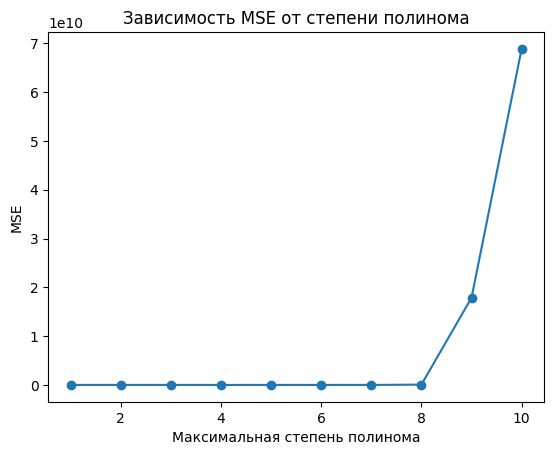

In [6]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']
mse_values = []

for degree in range(1, 11):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(range(1, 11), mse_values, marker='o')
plt.xlabel('Максимальная степень полинома')
plt.ylabel('MSE')
plt.title('Зависимость MSE от степени полинома')
plt.show()

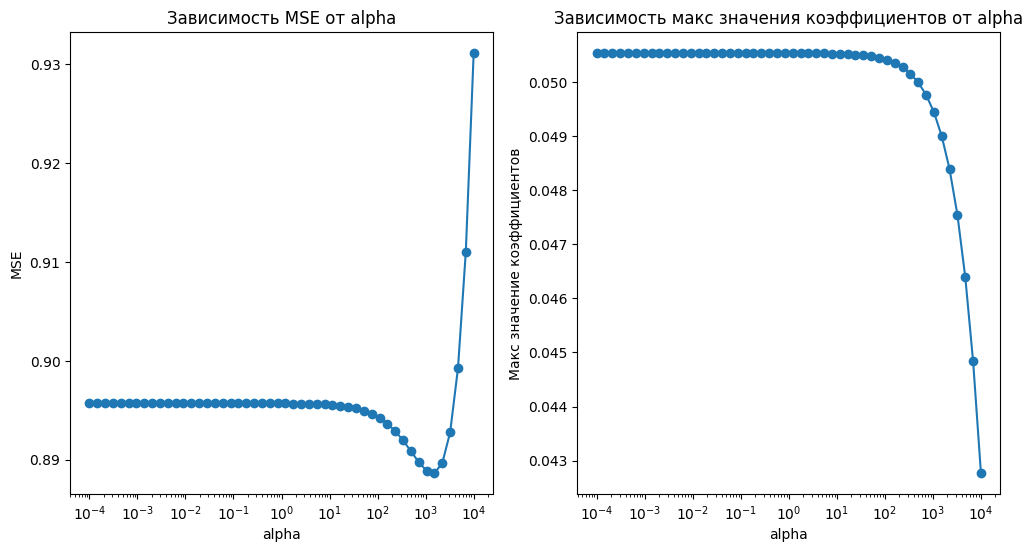

In [12]:
alpha_values = np.logspace(-4, 4, 50)
mse_values = []
max_coef_values = []

# Используем степень полинома 2
optimal_degree = 2
poly = PolynomialFeatures(optimal_degree)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    max_coef_values.append(np.max(np.abs(model.coef_)))

# Графики зависимости
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Зависимость MSE от alpha')

plt.subplot(1, 2, 2)
plt.plot(alpha_values, max_coef_values, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Макc значение коэффициентов')
plt.title('Зависимость макс значения коэффициентов от alpha')

plt.show()

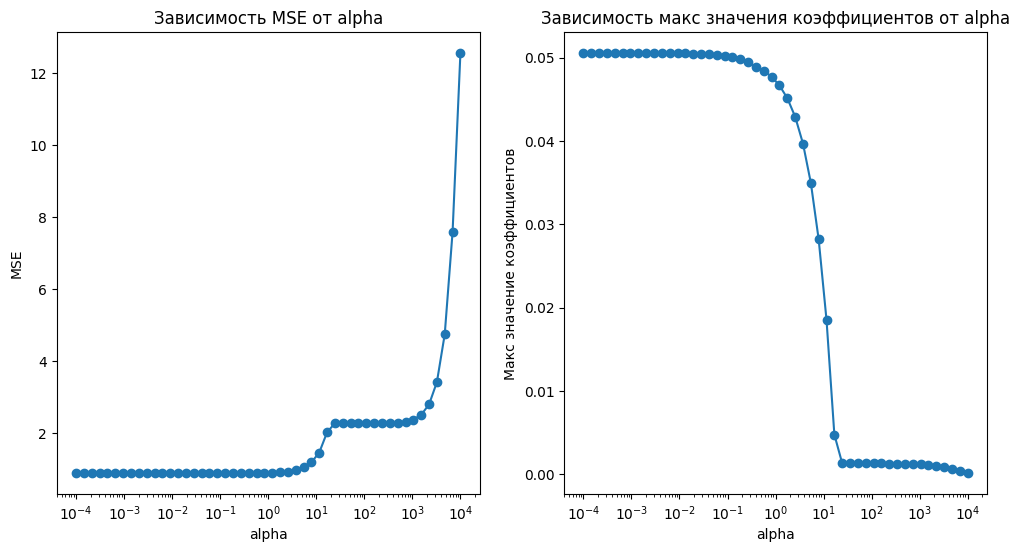

In [13]:
mse_values = []
max_coef_values = []

for alpha in alpha_values:
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    max_coef_values.append(np.max(np.abs(model.coef_)))

# Графики зависимости
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Зависимость MSE от alpha')

plt.subplot(1, 2, 2)
plt.plot(alpha_values, max_coef_values, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Макс значение коэффициентов')
plt.title('Зависимость макс значения коэффициентов от alpha')

plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

kernels = ['poly', 'sigmoid']
for kernel in kernels:
    svr_model = SVR(kernel=kernel, C=100, gamma=0.1)
    svr_model.fit(X_train, y_train)
    
    y_pred = svr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"SVR с ядром '{kernel}': MSE = {mse}")

SVR с ядром 'poly': MSE = 6.329632717776039
SVR с ядром 'sigmoid': MSE = 452.7738610369937
